In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
import numpy as np

class xornn:
    def __init__(self, lr=0.5):
        self.lr = lr
        
        # Initialize weights randomly
        self.wih = np.random.uniform(-1, 1, (2, 2)) 
        self.woh = np.random.uniform(-1, 1, (2, 1))  
        
        # Bias terms
        self.bih = np.random.uniform(-1, 1, (1, 2)) 
        self.boh = np.random.uniform(-1, 1, (1, 1)) 
        
        # Store training history
        self.errorhistory = []
    
    def sigmoid(self, x):
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))  
        
    def sigderiv(self, x):
        
        return x * (1 - x)
        
    def fpass(self, x):
        # Forward pass
        self.hi = np.dot(x, self.wih) + self.bih  
        self.ho = self.sigmoid(self.hi)           
        
        self.opip = np.dot(self.ho, self.woh) + self.boh 
        self.predop = self.sigmoid(self.opip)            
        
        return self.predop
    
    def bpass(self, x, y, predop):
        m = x.shape[0]
        
        operror = y - predop
        opdelta = operror * self.sigderiv(predop)  
        
        herror = opdelta.dot(self.woh.T)
        hdelta = herror * self.sigderiv(self.ho)
        
        # Update weights and biases
        self.woh += self.ho.T.dot(opdelta) * self.lr / m
        self.boh += np.sum(opdelta, axis=0, keepdims=True) * self.lr / m
        
        self.wih += x.T.dot(hdelta) * self.lr / m  
        self.bih += np.sum(hdelta, axis=0, keepdims=True) * self.lr / m
        
    def train(self, x, y, epochs=10000, printevery=1000):
        for epoch in range(epochs):
            predop = self.fpass(x)
            
            mse = np.mean((y - predop) ** 2)
            self.errorhistory.append(mse)
            
            self.bpass(x, y, predop)
            
            if epoch % printevery == 0: 
                print(f'epoch {epoch}, error: {mse:.6f}')
    
    def predict(self,x):
        return self.fpass(x)
    
    def printresults(self,x,y):
        pred=self.predict(x)
        print('\nfinal results:')
        print('input -> target | predicted -> rounded')
        print('-'*40)
        
        for i in range(len(x)):
            predval=pred[i][0]
            rval=round(predval)
            print(f'{x[i]} -> {y[i][0]:.0f}    |  {predval:.4f} -> {rval}')
        
        rpred=np.round(pred)
        accuracy=np.mean(rpred==y)*100
        print(f'accuracy: {accuracy:.1f}')

epoch 0, error: 0.254066
epoch 2000, error: 0.223533
epoch 4000, error: 0.004323
epoch 6000, error: 0.001723
epoch 8000, error: 0.001052

final results:
input -> target | predicted -> rounded
----------------------------------------
[0 0] -> 0    |  0.0303 -> 0
[0 1] -> 1    |  0.9740 -> 1
[1 0] -> 1    |  0.9738 -> 1
[1 1] -> 0    |  0.0270 -> 0
accuracy: 100.0


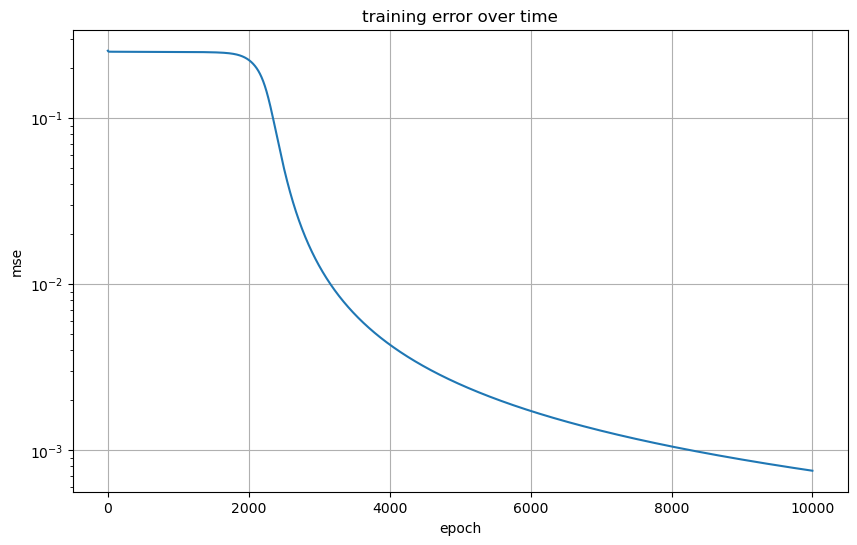

learned weights:
input to hidden: 
 [[ 5.37076357 -5.82837617]
 [-5.59057095  5.69095896]]
hidden to output: 
 [[8.5493491 ]
 [8.47353611]]
hidden bias:  [[-3.00521494 -3.19960148]]
output bias:  [[-4.20210437]]


In [21]:
def main():
    x=np.array([[0,0],[0,1],[1,0],[1,1]])
    y=np.array([[0],[1],[1],[0]])
    
    nn=xornn(lr=1.0)
    nn.train(x,y,epochs=10000,printevery=2000)
    
    nn.printresults(x,y)
    
    plt.figure(figsize=(10,6))
    plt.plot(nn.errorhistory)
    plt.title('training error over time')
    plt.xlabel('epoch')
    plt.ylabel('mse')
    plt.yscale('log')
    plt.grid(True)
    plt.show()
    
    print('learned weights:')
    print('input to hidden: \n',nn.wih)
    print('hidden to output: \n',nn.woh)
    print('hidden bias: ',nn.bih)
    print('output bias: ',nn.boh)
    
if __name__ == '__main__':
    main()